In [1]:
import numpy as np
from scipy.sparse import spdiags, identity, kron, linalg
from matplotlib import path

In [2]:
Lx, Ly = 7 * np.pi, 7 * np.pi
omega = 2  # wavenumber
Lambda = 2 * np.pi / omega  # wavelength
res_per_lam = 40  # resolution (#pixels per wavelength)
refInd = 1.31 + 0.0001j  # refractive index of scatterer
d = [1, 1]  # incident wave direction
d /= np.linalg.norm(d)
dx_temp = Lambda / res_per_lam
res = np.round(1 / dx_temp) 

In [3]:
M = np.int(round((Lx)*res))
N = np.int(round((Ly)*res))
dx = Lx / (M+1)
dy = Ly / (N+1)
x = np.arange(1, M+1) * dx - Lx/2
y = np.arange(1, N+1) * dy - Ly/2
X, Y = np.meshgrid(x, y)
x_coord = X + 1j*Y

In [4]:
x_coord.shape

(286, 286)

In [5]:
# Hexagonal scatterer
a = 2*np.pi
theta = np.linspace(0, 2*np.pi, 7)
# Generate vertices and locate points inside the polygon
xv = a * np.cos(theta)
yv = a * np.sin(theta)

verts = np.ones((len(theta), 2))
for i in range(len(theta)):
    verts[i] = np.array([xv[i], yv[i]])

p = path.Path(verts)

In [6]:
# Hankel function on boundary
from scipy.special import hankel1
A = 1
g = lambda x, y, ko: A * 1j/4 * hankel1(0, ko * np.abs(x - y))

In [84]:
# Parameterise points along an edge
n_s = 10
s = np.linspace(1/n_s, 1, n_s)
n_sides = 6
x_s = np.zeros(n_sides * n_s, dtype=np.complex128)
for i in range(n_sides):
    t = verts[i+1, :] - verts[i, :]
    x_s[i*n_s:(i+1)*n_s] = verts[i, 0] + 1j * verts[i, 1] + s * t[0] + 1j * s * t[1]

In [91]:
u = np.ones((M, N), dtype=np.complex128)
A = 1/n_s
for i in range(len(x_s)):
    A = 1/n_s * np.exp(1j*x_s[i])
    u += g(x_coord, x_s[i], omega)

In [92]:
u_in = np.ones((M, N), dtype=np.complex128)
for i in range(len(x_s)):
    A = 1/n_s * np.exp(1j*x_s[i])
    u_in += g(x_coord, x_s[i], omega*refInd)

In [93]:
from matplotlib import path
p = path.Path(verts)
Xvec = X.reshape(-1)
Yvec = Y.reshape(-1)
xy = [(Xvec[i], Yvec[i]) for i in range(Xvec.shape[0])]
idx = p.contains_points(xy)
inside = idx.reshape(X.shape)

In [94]:
u_all = u
u_all[inside] = u_in[inside]

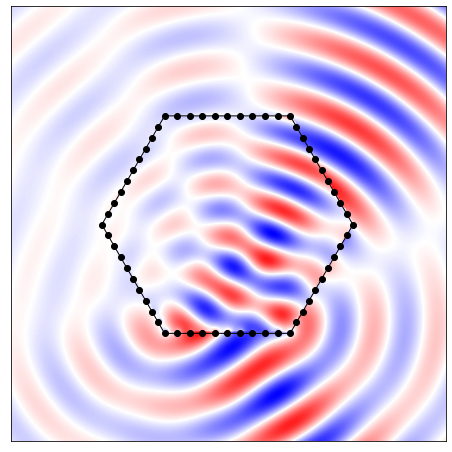

In [96]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
matplotlib.rcParams.update({'font.size': 20})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
start = 1
plt.imshow(np.real(np.flipud(u_all)), extent=[x[start],x[-start],y[start],y[-start]],cmap=plt.cm.get_cmap('bwr'), interpolation='spline16')

polygon = Polygon(verts, facecolor="none", 
              edgecolor='black', lw=1)
plt.gca().add_patch(polygon)
plt.scatter(x_s.real, x_s.imag,color='black')

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
# ax.grid(linestyle='-', linewidth=0.5, color='black')
# plt.box(on=None)
plt.show()
# fig.savefig('results/hex_dipoles_60_density.png')

In [13]:
M*N

81796